In [113]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.constants import c
from matplotlib import gridspec

In [14]:
mm1 = pd.read_csv('../data/part1_try1.csv')
mm2 = pd.read_csv('../data/part2.csv')
mm3 = pd.read_csv('../data/PART1_2.csv')

In [31]:
datapt1 = mm1.iloc[1:]
datapt1

,Set,Set.1,Run #1,Run #1.1,Run #1.2,Run #1.3,Run #2,Run #2.1,Run #2.2,Run #2.3,...,Run #4.2,Run #4.3,Run #5,Run #5.1,Run #5.2,Run #5.3,Run #6,Run #6.1,Run #6.2,Run #6.3
1,365,8.21E+14,350.800,-1.086E-14,-0.376,0.38,169.200,5.286E-14,-1.080,1.08,...,-1.495,1.49,54.600,2.551E-14,-1.874,1.87,61.350,2.234E-14,-1.495,1.49
2,405,7.40E+14,429.100,-1.172E-14,0.927,-0.93,238.400,8.057E-15,-0.920,0.92,...,-1.188,1.19,110.000,-6.958E-14,-1.523,1.52,131.750,1.733E-14,-1.255,1.25
3,436,6.88E+14,NaN,NaN,NaN,NaN,323.250,-4.236E-14,-0.797,0.80,...,-1.036,1.04,180.750,-6.641E-14,-1.328,1.33,206.850,2.173E-14,-1.039,1.04
4,546,5.49E+14,NaN,NaN,NaN,NaN,461.950,2.429E-14,-0.170,0.17,...,-0.588,0.59,252.650,1.917E-14,-0.856,0.86,283.200,8.789E-15,-0.601,0.60
5,577,5.20E+14,NaN,NaN,NaN,NaN,482.250,9.644E-15,-0.109,0.11,...,-0.569,0.57,313.250,-6.348E-15,-0.713,0.71,345.200,-3.174E-15,-0.467,0.47


In [36]:
data1 = pd.read_csv('../data/datapart1.csv')
data2 = pd.read_csv('../data/datapart2.csv')
data1.head()

,Wavelength,Time (s),Current (A),Voltage (V),Stopping Potential (V),Time (s).1,Current (A).1,Voltage (V).1,Stopping Potential (V).1,Time (s).2,Current (A).2,Voltage (V).2,Stopping Potential (V).2
0,365,61.35,2.230000e-14,-1.495,1.49,257.40,5.100000e-14,-1.847,1.85,60.70,2.100000e-14,-1.688,1.69
1,405,131.75,1.730000e-14,-1.255,1.25,303.70,-5.490000e-15,-1.410,1.41,95.40,5.870000e-14,-1.227,1.23
2,436,206.85,2.170000e-14,-1.039,1.04,352.70,-2.920000e-14,-1.199,1.20,132.80,3.150000e-14,-1.147,1.15
3,546,283.20,8.790000e-15,-0.601,0.60,414.20,-2.340000e-14,-0.662,0.66,343.45,2.100000e-14,-0.485,0.49
4,577,345.20,-3.170000e-15,-0.467,0.47,449.75,-5.090000e-14,-0.547,0.55,370.60,8.910000e-15,-0.400,0.40


In [42]:
stpV40cm = data1['Stopping Potential (V)'].values
stpV30cm = data1['Stopping Potential (V).1'].values
stpV20cm = data1['Stopping Potential (V).2'].values

In [50]:
wvvlen = data1['Wavelength'].values
freq = c/(wvvlen*10**-9)

In [52]:
freq = freq*10**-12

In [53]:
def func(x, m, b):
    return  m*x + b

In [81]:
A = np.vstack([freq, np.ones(len(freq))]).T
m40, b40 = np.linalg.lstsq(A,stpV40cm, rcond=None)[0]
m30, b30 = np.linalg.lstsq(A,stpV30cm, rcond=None)[0]
m20, b20 = np.linalg.lstsq(A,stpV20cm, rcond=None)[0]
frange = np.linspace(freq[4], freq[0])

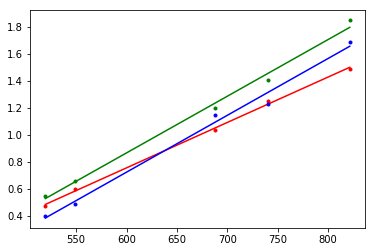

In [82]:
plt.plot(freq, stpV40cm ,'r.',label = "40cm distance")
plt.plot(frange, func(frange,m40,b40), 'r-')
plt.plot(freq, stpV30cm ,'g.',label = "40cm distance")
plt.plot(frange, func(frange,m30,b30), 'g-')
plt.plot(freq, stpV20cm ,'b.',label = "40cm distance")
plt.plot(frange, func(frange,m20,b20), 'b-')
plt.show()

In [97]:
res40 = [x-y for [x,y] in zip(stpV40cm,func(freq,m40,b40))]
res30 = [x-y for [x,y] in zip(stpV30cm,func(freq,m30,b30))]
res20 = [x-y for [x,y] in zip(stpV20cm,func(freq,m20,b20))]

In [102]:
err = np.std([res40,res30,res20])
err

0.03651246886334069

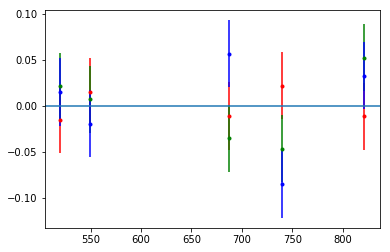

In [111]:
plt.errorbar(freq,res40,err,fmt='r.',ecolor='r')

plt.errorbar(freq,res30,err,fmt='g.',ecolor='g')

plt.errorbar(freq,res20,err,fmt='b.',ecolor='b')
plt.axhline(y=0)
plt.show()

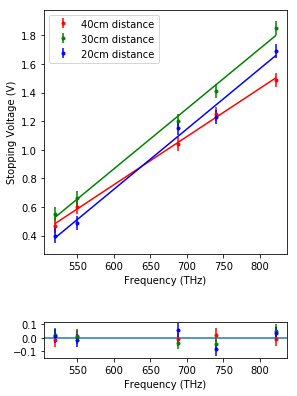

In [124]:
fig = plt.figure(1)
gridspec.GridSpec(4,4)

plt.subplot2grid((4,4), (0,0), colspan=4, rowspan=3)
plt.errorbar(freq, stpV40cm,yerr = 0.05,fmt='r.',label = "40cm distance")
plt.plot(frange, func(frange,m40,b40), 'r-')
plt.errorbar(freq, stpV30cm,yerr = 0.05, fmt='g.',label = "30cm distance")
plt.plot(frange, func(frange,m30,b30), 'g-')
plt.errorbar(freq, stpV20cm,yerr = 0.05,fmt='b.',label = "20cm distance")
plt.plot(frange, func(frange,m20,b20), 'b-')

plt.ylabel("Stopping Voltage (V)")
plt.xlabel("Frequency (THz)")
plt.legend()

plt.subplot2grid((4,4), (3,0),colspan=4, rowspan=1)
plt.errorbar(freq,res40,yerr = 0.05,fmt='r.',ecolor='r')

plt.errorbar(freq,res30,yerr = 0.05,fmt='g.',ecolor='g')

plt.errorbar(freq,res20,yerr = 0.05,fmt='b.',ecolor='b')
plt.axhline(y=0)
plt.xlabel("Frequency (THz)")

fig.tight_layout()
fig.set_size_inches(w=4,h=6)

In [125]:
data2.head()


,Time (s),Current (A),Voltage (V),Stopping Potential (V),Time (s).1,Current (A).1,Voltage (V).1,Stopping Potential (V).1,Time (s).2,Current (A).2,Voltage (V).2,Stopping Potential (V).2
0,134.35,1.950000e-11,30.006,-30.01,85.65,7.640000e-11,30.023,-30.02,35.10,3.210000e-10,30.024,-30.02
1,161.70,1.840000e-11,28.004,-28.00,91.50,7.360000e-11,27.995,-27.99,40.50,3.160000e-10,28.064,-28.06
2,192.95,1.700000e-11,26.006,-26.01,95.80,7.090000e-11,25.926,-25.93,45.55,3.090000e-10,26.633,-26.63
3,227.90,1.660000e-11,23.998,-24.00,101.55,6.740000e-11,24.031,-24.03,51.60,3.030000e-10,26.057,-26.06
4,250.00,1.570000e-11,22.001,-22.00,109.55,6.410000e-11,22.020,-22.02,58.15,2.870000e-10,24.066,-24.07


In [129]:
i2 = data2['Current (A)'].values
v2 = data2['Voltage (V)'].values
i4 = data2['Current (A).1'].values
v4 = data2['Voltage (V).1'].values
i8 = data2['Current (A).2'].values
v8 = data2['Voltage (V).2'].values

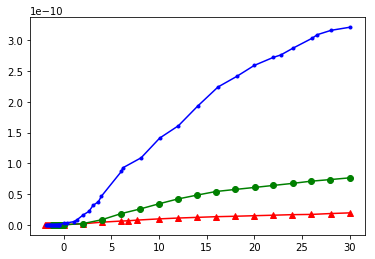

In [134]:
plt.plot(v2,i2,'r^-')
plt.plot(v4,i4,'go-')
plt.plot(v8,i8,'b.-')
plt.show()

In [254]:
vhigh = 0.5
vlow = -1
i2s = [ x for [x,y] in zip(i2,v2) if y<vhigh and y>vlow]
v2s = [ x for x in v2 if x<vhigh and x>vlow]
i4s = [ x for [x,y] in zip(i4,v4) if y<vhigh and y>vlow]
v4s = [ x for x in v4 if x<vhigh and x>vlow]
i8s = [ x for [x,y] in zip(i8,v8) if y<vhigh and y>vlow]
v8s = [ x for x in v8 if x<vhigh and x>vlow]

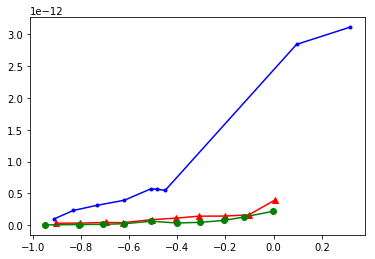

In [255]:
plt.plot(v2s,i2s,'r^-')
plt.plot(v4s,i4s,'go-')
plt.plot(v8s,i8s,'b.-')
plt.show()

In [256]:
i2r = [x*10**12 for x in i2s]
i4r = [x*10**12 for x in i4s]
i8r = [x*10**12 for x in i8s]

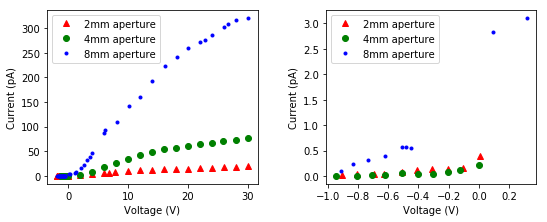

In [258]:
fig = plt.figure(1)
gridspec.GridSpec(1,2)

plt.subplot2grid((1,2), (0,0), colspan=1, rowspan=1)
plt.plot(v2,i2*10**12,'r^',label = "2mm aperture")
plt.plot(v4,i4*10**12,'go',label = "4mm aperture")
plt.plot(v8,i8*10**12,'b.',label = "8mm aperture")

plt.ylabel("Current (pA)")
plt.xlabel("Voltage (V)")
plt.legend()

plt.subplot2grid((1,2), (0,1),colspan=1, rowspan=1)
plt.plot(v2s,i2r,'r^',label = "2mm aperture")
plt.plot(v4s,i4r,'go',label = "4mm aperture")
plt.plot(v8s,i8r,'b.',label = "8mm aperture")

plt.ylabel("Current (pA)")
plt.xlabel("Voltage (V)")
plt.legend()

fig.tight_layout()
fig.set_size_inches(w=8,h=3)